In [44]:
import numpy as np
import pandas as pd

In [45]:
df=pd.read_csv('YieldDataset\crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [46]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [47]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [48]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [49]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64

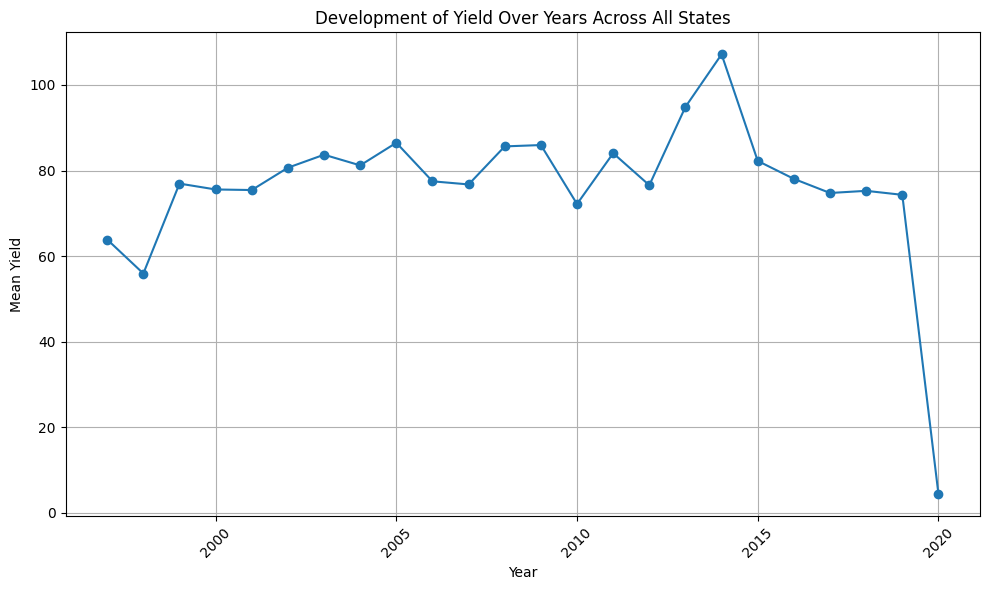

In [50]:
import matplotlib.pyplot as plt

yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

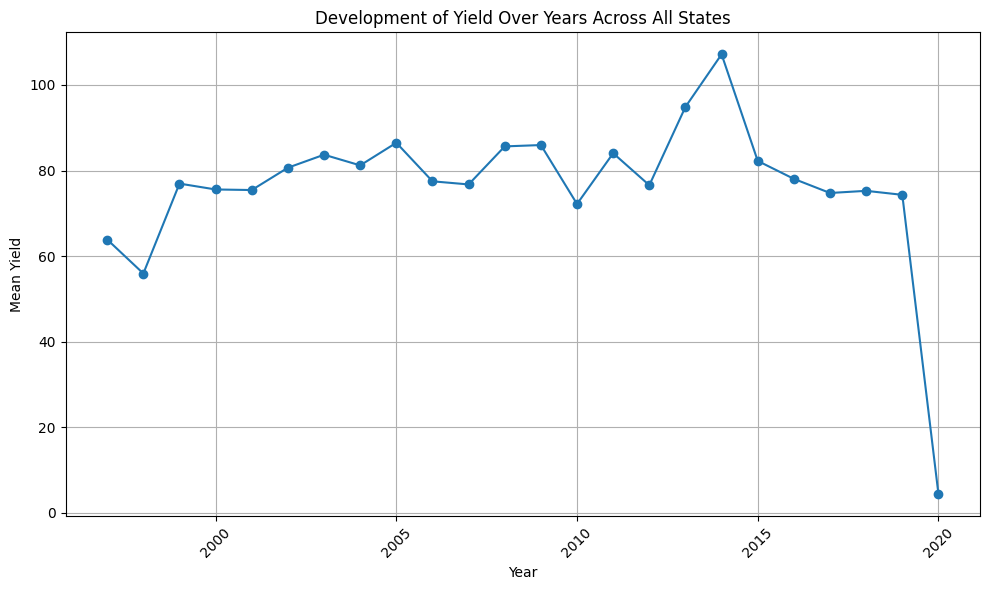

In [51]:
import matplotlib.pyplot as plt

yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

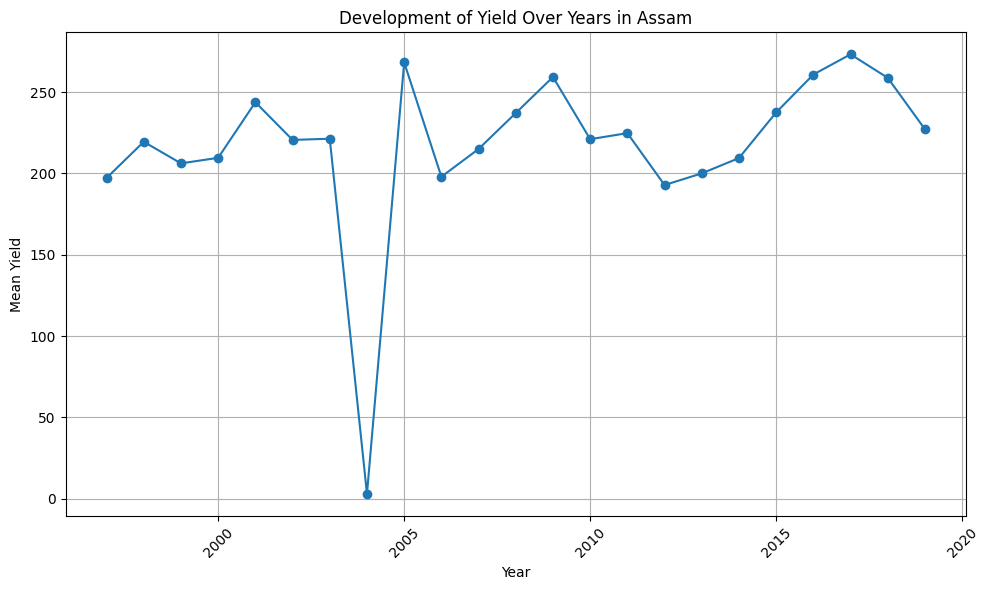

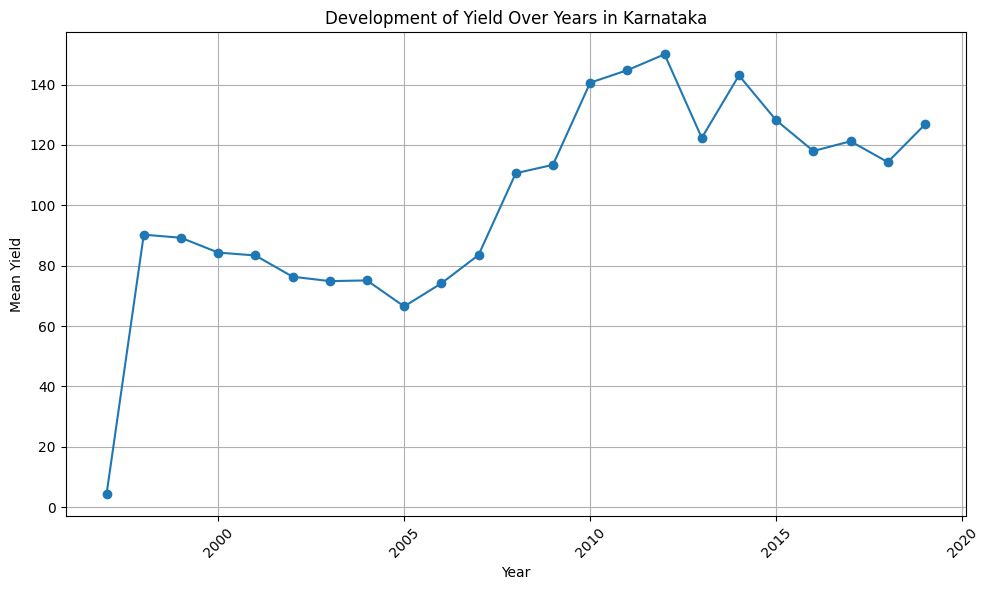

In [52]:
states = df['State'].unique()

i = 0
for state in states:

    state_data = df[df['State'] == state]

    yearly_yield = state_data.groupby('Crop_Year')['Yield'].mean().reset_index()
    
    i = i + 1
    
    if i > 2 :
        break
        
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
    plt.title(f'Development of Yield Over Years in {state}')
    plt.xlabel('Year')
    plt.ylabel('Mean Yield')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [53]:
df1 = df.copy()
df1 = df1.drop(['Crop_Year'], axis = 1)

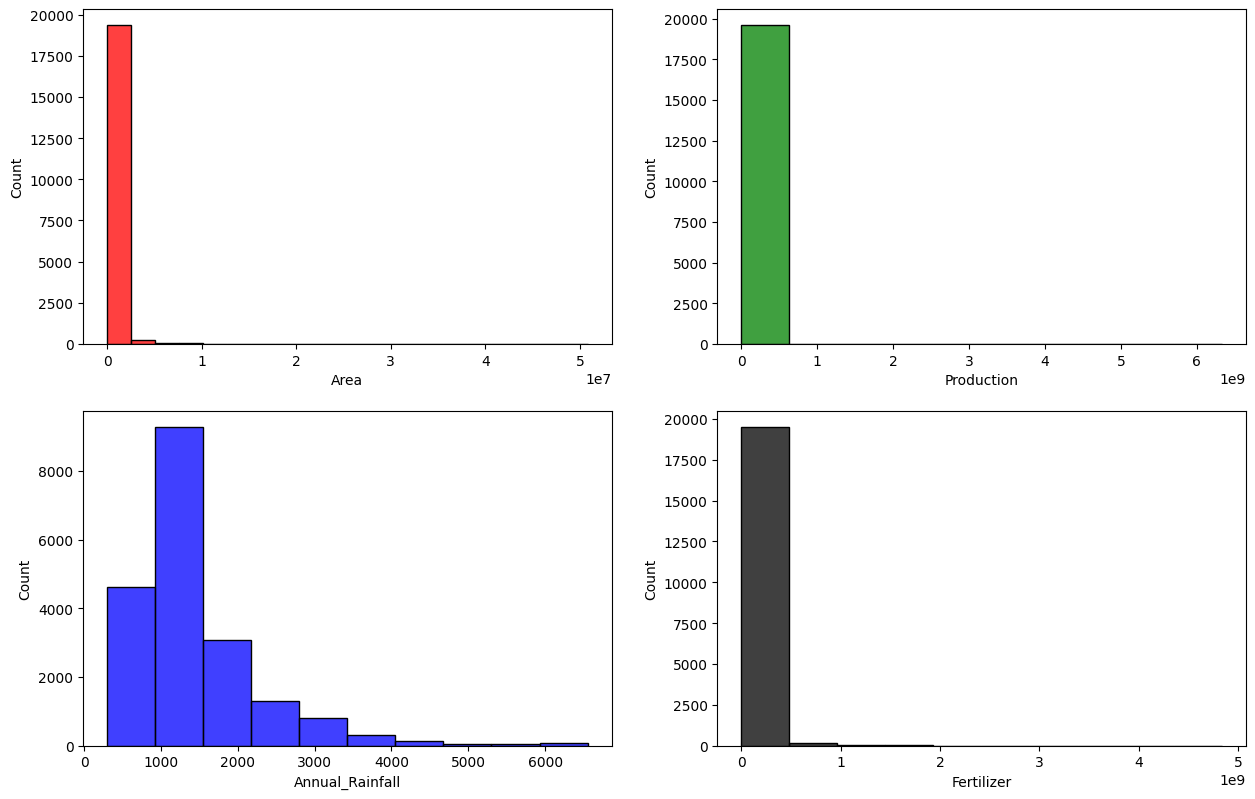

In [54]:
import seaborn as sns

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.histplot(df1['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.histplot(df1['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.histplot(df1['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.histplot(df1['Fertilizer'],bins = 10, color = 'black')
plt.show()

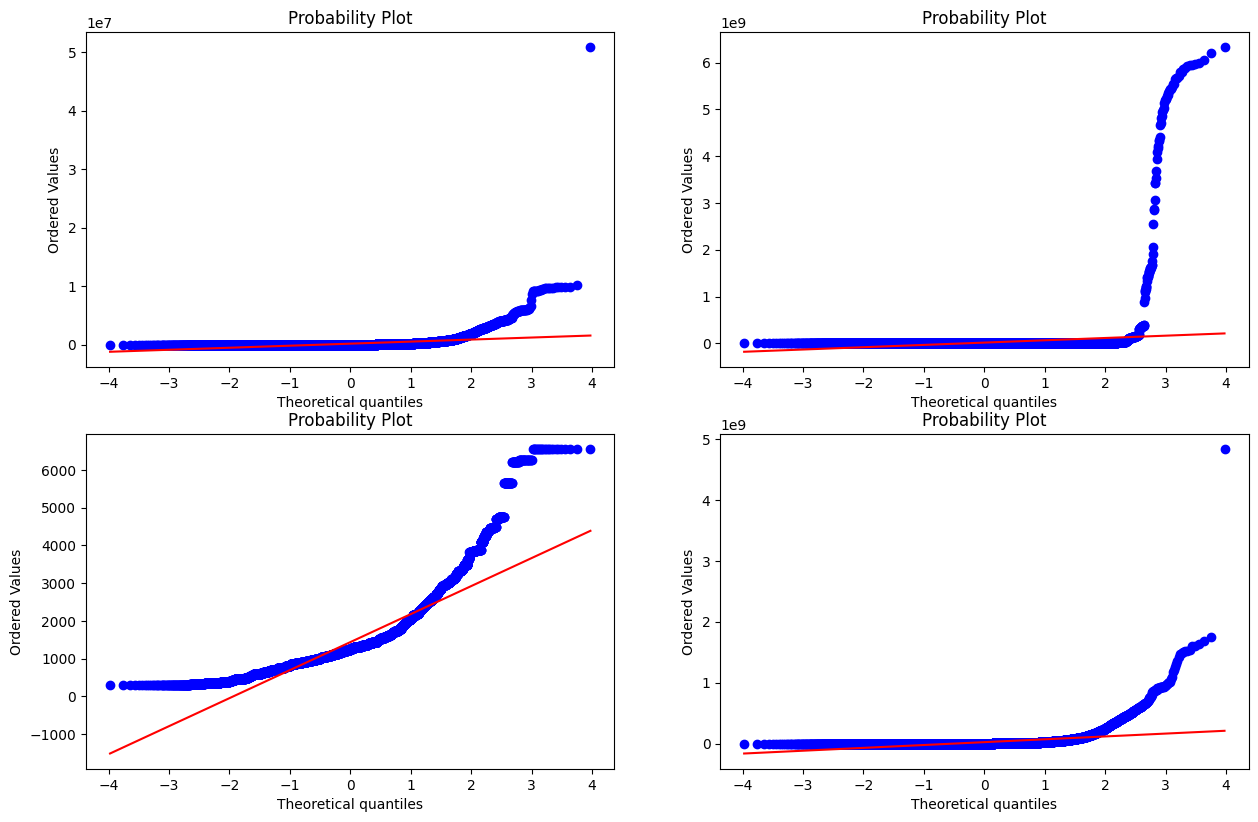

In [55]:
import scipy.stats as stats

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
stats.probplot(df1['Area'], dist = 'norm', plot = plt)
plt.subplot(4,2,2)
stats.probplot(df1['Production'], dist = 'norm', plot = plt)
plt.subplot(4,2,3)
stats.probplot(df1['Annual_Rainfall'], dist = 'norm', plot = plt)
plt.subplot(4,2,4)
stats.probplot(df1['Fertilizer'], dist = 'norm', plot = plt)
plt.show()

Data distribution have right skewness - to remove skewness using transformation approach
The algorithm is more likely to be biased when the data distribution is skewed

In [56]:
category_columns = df1.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [57]:
df1 = pd.get_dummies(df1, columns = category_columns, drop_first=True)

In [58]:
df1.shape

(19689, 95)

In [59]:
df1.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
x = df1.drop(['Yield'], axis = 1)
y = df1[['Yield']]

In [61]:
print(x.shape)
y.shape

(19689, 94)


(19689, 1)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [63]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((15751, 94), (3938, 94), (15751, 1), (3938, 1))

Power Transformation using the method 'Yeo-Johnson'

In [64]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

x_train_transform1 = pt.fit_transform(x_train)
x_test_transform1 = pt.fit_transform(x_test)

c:\Users\shala\Downloads\Project 1\.venv\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\shala\Downloads\Project 1\.venv\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [65]:
df_trans = pd.DataFrame(x_train_transform1, columns=x_train.columns)
df_trans.head()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,0.251370,-1.075788,-0.715962,1.907533,-1.006257,-1.017955,-0.161629,-0.166525,-0.110204,-0.125699,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
1,-0.365606,-1.522011,-1.187932,-1.238092,-1.515720,-1.679552,-0.161629,-0.166525,-0.110204,7.955488,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057
2,-1.494427,-1.239694,-1.428779,-0.699476,-1.300878,-1.248039,-0.161629,-0.166525,-0.110204,-0.125699,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,4.733303,-0.202084,-0.241057
3,0.738806,0.247029,0.197346,0.054274,0.286890,0.336490,-0.161629,-0.166525,-0.110204,7.955488,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,4.948440,-0.241057
4,-1.086844,1.485555,0.978650,-0.898001,1.350606,1.458014,-0.161629,-0.166525,-0.110204,-0.125699,...,-0.199345,-0.186237,-0.141458,-0.111086,-0.210283,-0.145149,-0.151629,-0.211269,-0.202084,-0.241057


<Axes: xlabel='Fertilizer', ylabel='Count'>

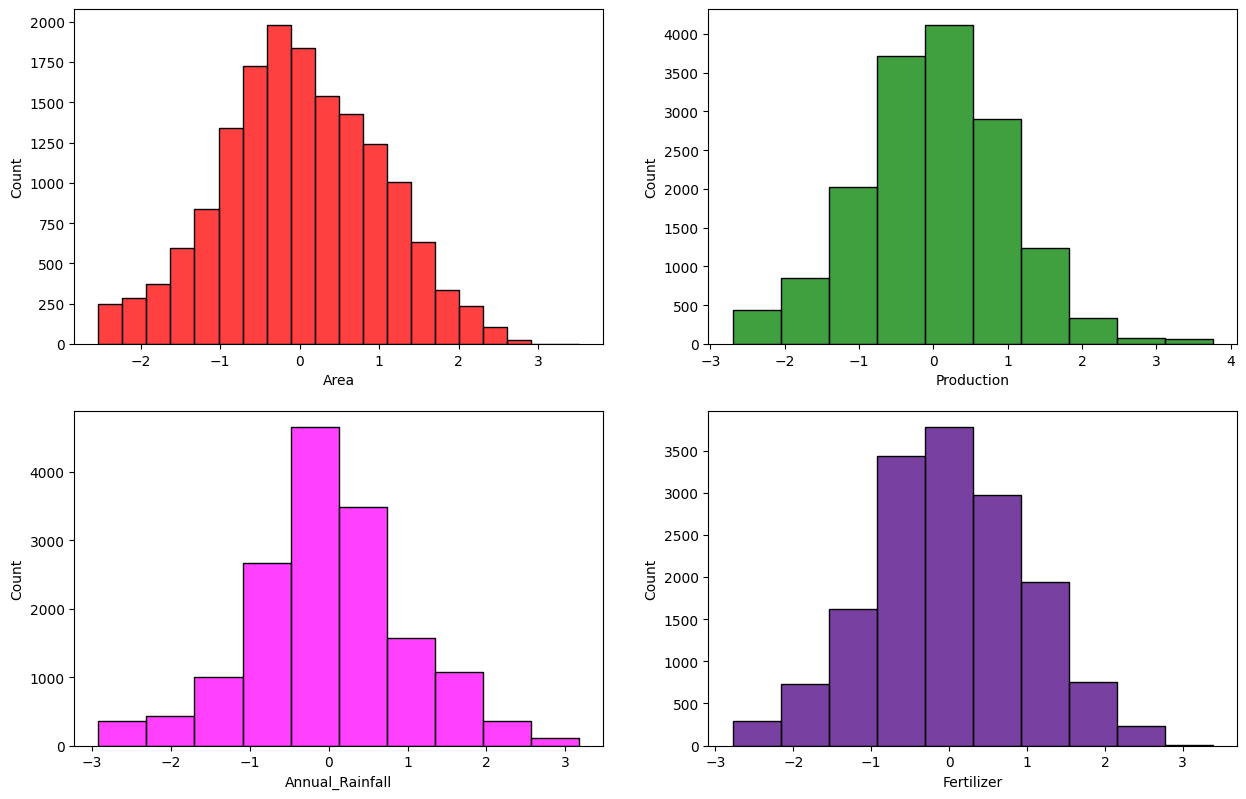

In [66]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.histplot(df_trans['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.histplot(df_trans['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.histplot(df_trans['Annual_Rainfall'],bins = 10,color = 'fuchsia')
plt.subplot(4,2,4)
sns.histplot(df_trans['Fertilizer'],bins = 10, color = 'indigo')

Data is Standardized


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_accu = []
test_accu = []

In [68]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

regr.fit(x_train_transform1, y_train)

y_pred_train_regr= regr.predict(x_train_transform1)
y_pred_test_regr = regr.predict(x_test_transform1)

mse = mean_squared_error(y_test, y_pred_test_regr)
mae = mean_absolute_error(y_test, y_pred_test_regr)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_regr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_regr))
print('MAE: ',mae)
print('MSE: ',mse)

train_accu.append(r2_score(y_train,y_pred_train_regr))
test_accu.append(r2_score(y_test,y_pred_test_regr))

c:\Users\shala\Downloads\Project 1\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy :  0.9967089192960613
Test Accuracy :  0.9839405926621727
MAE:  8.313901539690635
MSE:  12867.43736586619


In [69]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_transform1, y_train)

y_pred_train_svr= svr.predict(x_train_transform1)
y_pred_test_svr = svr.predict(x_test_transform1)

mse = mean_squared_error(y_test, y_pred_test_svr)
mae = mean_absolute_error(y_test, y_pred_test_svr)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_svr))
print("Test Accuracy : ",r2_score(y_test, y_pred_test_svr))
print('MAE: ',mae)
print('MSE: ',mse)

train_accu.append(r2_score(y_train,y_pred_train_svr))
test_accu.append(r2_score(y_test,y_pred_test_svr))

c:\Users\shala\Downloads\Project 1\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy :  0.007282681458325335
Test Accuracy :  0.006373028831735406
MAE:  75.80628043920716
MSE:  796133.5401479831


In [70]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(learning_rate=0.15)
cat.fit(x_train_transform1, y_train)

y_pred_train_cat = cat.predict(x_train_transform1)
y_pred_test_cat = cat.predict(x_test_transform1)

print("Training Accuracy : ",r2_score(y_train, y_pred_train_cat))
print()
print("Test Accuracy : ",r2_score(y_test, y_pred_test_cat))

train_accu.append(r2_score(y_train,y_pred_train_cat))
test_accu.append(r2_score(y_test,y_pred_test_cat))

0:	learn: 764.1514520	total: 12.4ms	remaining: 12.4s
1:	learn: 666.2638752	total: 15.8ms	remaining: 7.89s
2:	learn: 580.6595000	total: 18.6ms	remaining: 6.17s
3:	learn: 511.8264868	total: 21.3ms	remaining: 5.3s
4:	learn: 455.6508742	total: 24.4ms	remaining: 4.86s
5:	learn: 405.5994690	total: 27.3ms	remaining: 4.52s
6:	learn: 359.5190330	total: 30ms	remaining: 4.25s
7:	learn: 324.2023984	total: 32.9ms	remaining: 4.08s
8:	learn: 291.8543398	total: 35.8ms	remaining: 3.94s
9:	learn: 265.2943315	total: 39.1ms	remaining: 3.87s
10:	learn: 244.4622058	total: 42ms	remaining: 3.78s
11:	learn: 223.3416981	total: 45ms	remaining: 3.71s
12:	learn: 202.4962708	total: 48ms	remaining: 3.65s
13:	learn: 188.2453195	total: 51.3ms	remaining: 3.61s
14:	learn: 176.7072186	total: 54.9ms	remaining: 3.6s
15:	learn: 165.6136814	total: 58.3ms	remaining: 3.58s
16:	learn: 155.9431337	total: 61.4ms	remaining: 3.55s
17:	learn: 147.6601463	total: 64.3ms	remaining: 3.51s
18:	learn: 141.2219076	total: 67.3ms	remaining: 

In [71]:
algorithm = ['RandomForestRegressor','SupprtVectorRegressor','CatBoostRegressor']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
RandomForestRegressor,0.996709,0.983941
SupprtVectorRegressor,0.007283,0.006373
CatBoostRegressor,0.999985,0.971742


In [72]:
import pickle

# Assuming `regr` is your trained RandomForestRegressor model and `pt` is your PowerTransformer

# Save the RandomForestRegressor model
with open('rf_yield_model.pkl', 'wb') as model_file:
    pickle.dump(regr, model_file)

# Save the PowerTransformer
with open('yield_transformer.pkl', 'wb') as transformer_file:
    pickle.dump(pt, transformer_file)